In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
import random
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.constraints import maxnorm
from tensorflow.keras.utils import to_categorical


2023-06-18 12:28:42.856569: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-18 12:28:43.357338: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-18 12:28:43.363054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-18 12:28:48.655881: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset_dir = './_data'

train_ratio = 0.8  # 80% for training, 20% for testing
# Lists to store the file paths and labels
file_paths = []
label_ids = []
labels = ['A', 'B', 'C', 'D', 'E', 'Exceptions']

In [4]:
import tensorflow as tf

devices = tf.config.list_physical_devices("GPU")

if devices:
  print("TensorFlow is running with your GPU")
else:
  print("TensorFlow is not running with your GPU")

2023-06-18 13:22:14.792718: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-18 13:22:15.020061: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-18 13:22:15.024172: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-18 13:22:17.000255: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensorFlow is not running with your GPU


2023-06-18 13:22:19.801913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-18 13:22:19.966481: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Checking if any image is corrupted or not

In [3]:
import cv2
import os


image_files = [f for f in os.listdir(dataset_dir) ]

for image_file in image_files:
  new_path = dataset_dir + '/' + image_file
  files = [f for f in os.listdir(new_path) if os.path.isfile(os.path.join(new_path, f))]

  for i in range(len(files)):
    try:
        img = cv2.imread(new_path + '/' + files[i])
        dummy = img.shape # this line will throw the exception
    except:
        print("[INFO] Image is not available or corrupted.")
        print(new_path+'/'+files[i])


NameError: name 'dataset_dir' is not defined

In [5]:
import os
# Iterate through each class directory
for label_id, label in enumerate(labels):
    class_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(class_dir):
        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        file_paths.extend([os.path.join(class_dir, f) for f in image_files])
        label_ids.extend([label_id] * len(image_files))

# Shuffle the file paths and label IDs
tf.random.set_seed(42)
tf.random.shuffle(file_paths)
tf.random.set_seed(42)
tf.random.shuffle(label_ids)

# Split the dataset into training and testing sets using stratified sampling
X_train_paths, X_test_paths, y_train_ids, y_test_ids = train_test_split(file_paths, label_ids, train_size=train_ratio, stratify=label_ids)

# Convert the image data into NumPy arrays
X_train = np.array([img_to_array(load_img(path, target_size=(130, 20))) for path in X_train_paths])
X_test = np.array([img_to_array(load_img(path, target_size=(130, 20))) for path in X_test_paths])

# Normalizing and performing one-hot encoding
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

# Convert the label IDs into one-hot encoded vectors
y_train = to_categorical(y_train_ids, num_classes=len(labels))
y_test = to_categorical(y_test_ids, num_classes=len(labels))

num_classes = y_test.shape[1]
num_classes

6

In [6]:
'./_data/Exceptions/Question2-scan0047.jpg' in X_train_paths

True

In [7]:
import keras

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(130,20,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 20, 32)       896       
                                                                 
 dropout (Dropout)           (None, 130, 20, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 130, 20, 32)       9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 65, 10, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 65, 10, 64)        0         
                                                        

In [9]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [10]:
hist = model.fit(X_train, y_train , epochs=15, validation_split=0.1)

2023-06-18 12:29:04.196230: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 215872800 exceeds 10% of free system memory.


Epoch 1/15
217/217 [==============================] - 146s 660ms/step - loss: 1.5080 - accuracy: 0.3305 - val_loss: 0.5725 - val_accuracy: 0.8127
Epoch 2/15
217/217 [==============================] - 144s 662ms/step - loss: 0.4262 - accuracy: 0.8718 - val_loss: 0.2919 - val_accuracy: 0.9142
Epoch 3/15
217/217 [==============================] - 164s 758ms/step - loss: 0.2777 - accuracy: 0.9253 - val_loss: 0.2059 - val_accuracy: 0.9441
Epoch 4/15
217/217 [==============================] - 146s 672ms/step - loss: 0.2215 - accuracy: 0.9409 - val_loss: 0.1708 - val_accuracy: 0.9532
Epoch 5/15
217/217 [==============================] - 149s 687ms/step - loss: 0.1848 - accuracy: 0.9513 - val_loss: 0.1650 - val_accuracy: 0.9571
Epoch 6/15
217/217 [==============================] - 109s 502ms/step - loss: 0.1644 - accuracy: 0.9552 - val_loss: 0.1392 - val_accuracy: 0.9623
Epoch 7/15
217/217 [==============================] - 102s 469ms/step - loss: 0.1566 - accuracy: 0.9595 - val_loss: 0.1885 -

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
fig.show()

NameError: name 'hist' is not defined

<Figure size 640x480 with 0 Axes>

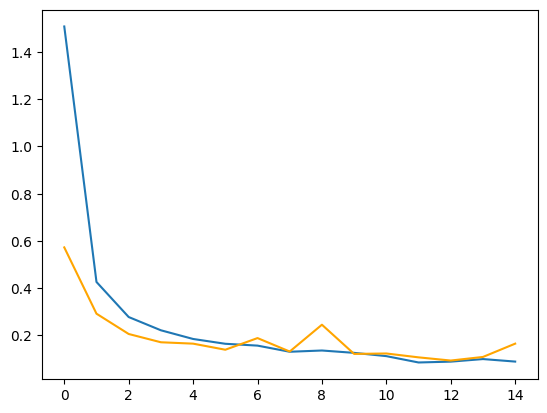

In [25]:
fig
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

In [26]:
predictions = model.predict(X_test)
rounded_predictions = np.apply_along_axis(lambda x: np.round(x), 1, predictions)

61/61 [==============================] - 6s 90ms/step


In [27]:
predictions = tf.argmax(predictions, axis=1)


In [28]:
y_test_argmax = tf.argmax(y_test, axis=1)

In [29]:
cm = tf.math.confusion_matrix(y_test_argmax, predictions)
cm = cm/cm.numpy().sum(axis=1)[:, tf.newaxis]

In [30]:
cm.numpy()

array([[0.97837838, 0.00540541, 0.        , 0.0027027 , 0.0027027 ,
        0.01081081],
       [0.00569801, 0.98290598, 0.002849  , 0.        , 0.002849  ,
        0.00569801],
       [0.0132626 , 0.01061008, 0.97612732, 0.        , 0.        ,
        0.        ],
       [0.00543478, 0.00543478, 0.01358696, 0.94836957, 0.02445652,
        0.00271739],
       [0.00795756, 0.00795756, 0.        , 0.00795756, 0.9734748 ,
        0.00265252],
       [0.06329114, 0.03797468, 0.02531646, 0.        , 0.12658228,
        0.74683544]])

In [1]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square=True, cmap='Blues_r', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Confusion matrix")
plt.show()

NameError: name 'plt' is not defined

In [ ]:
from tensorflow.keras.metrics import Precision, Accuracy, Recall, BinaryAccuracy

labels = y_test

precision = Precision()
accuracy = Accuracy()
recall = Recall()

In [ ]:
# Evaluate the metrics
precision.update_state(labels, rounded_predictions)
accuracy.update_state(labels, rounded_predictions)
recall.update_state(labels, rounded_predictions)

# Print the metrics
print('Precision:', precision.result().numpy())
print('Accuracy:', accuracy.result().numpy())
print('Recall:', recall.result().numpy())

Precision: 0.9714739
Accuracy: 0.98812
Recall: 0.95681584


In [21]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.25%


1/1 [==============================] - 0s 37ms/step


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

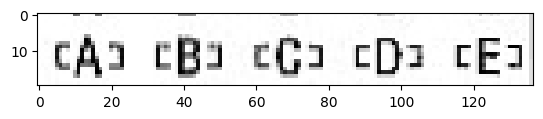

In [22]:
a = cv2.imread(dataset_dir + '/Exceptions/Question2-scan0047 - Copy.jpg')
resize = tf.image.resize(a, (130, 20))

b = model.predict(np.expand_dims(resize/255, 0))
plt.imshow(a)
e = np.apply_along_axis(lambda x: np.round(x), 1, b)
e

In [23]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models', 'model1.h5'))